In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [31]:
# Load the dataset
df = pd.read_excel(r"C:\Users\kindu\Documents\Data Analysis\Grid\monthly_hourly_load_values_SE_2024.xlsx")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         8784 non-null   datetime64[ns]
 1   consumption  8784 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 137.4 KB
None

First 5 rows:
                 time  consumption
0 2024-01-01 00:00:00        16763
1 2024-01-01 01:00:00        16597
2 2024-01-01 02:00:00        16374
3 2024-01-01 03:00:00        16406
4 2024-01-01 04:00:00        16592


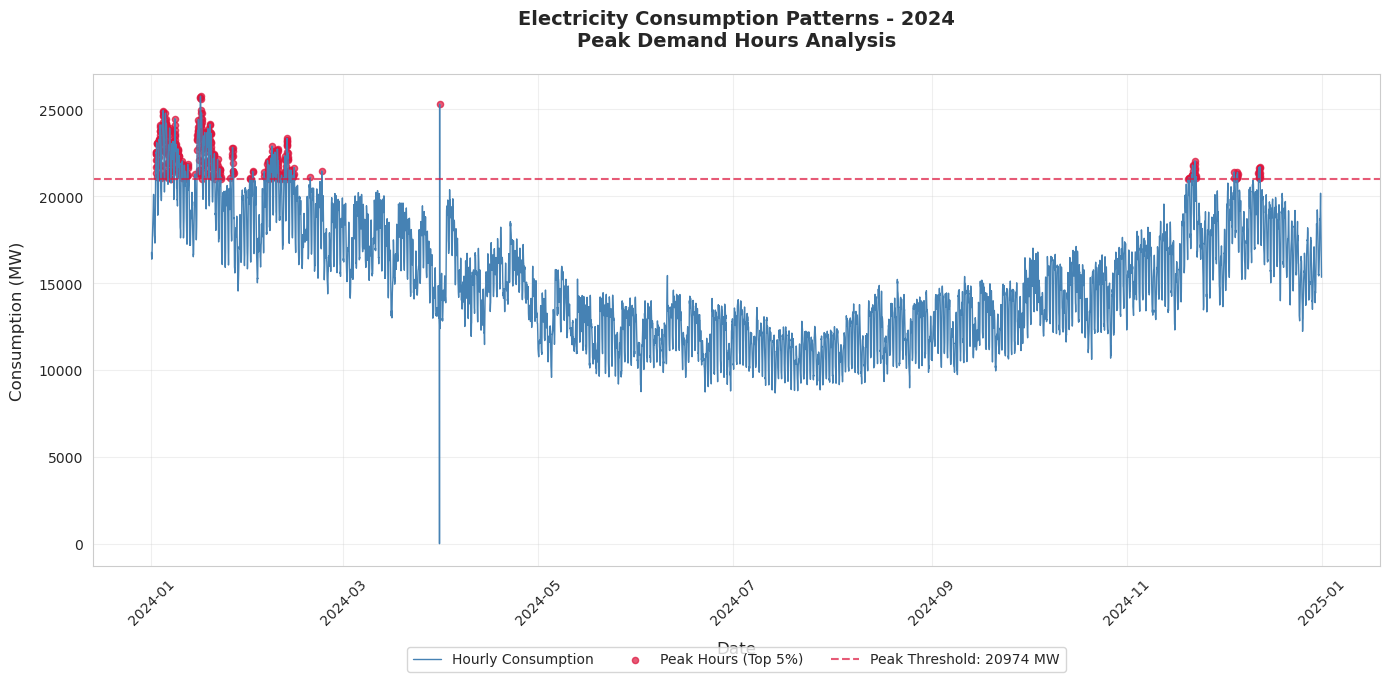

In [32]:
# Convert time column to datetime and set as index
df['time'] = pd.to_datetime(df['time'], dayfirst=True, format='mixed')
df.set_index('time', inplace=True)

# Resample to hourly frequency and calculate summary statistics
hourly_consumption = df.resample('H').sum()
peak_threshold = hourly_consumption['consumption'].quantile(0.95)
peak_hours = hourly_consumption[hourly_consumption['consumption'] > peak_threshold]

# Create visualization with enhanced styling
plt.figure(figsize=(14, 7))
plt.plot(hourly_consumption.index, hourly_consumption['consumption'], 
         color='steelblue', linewidth=1, label='Hourly Consumption')
plt.scatter(peak_hours.index, peak_hours['consumption'], 
           color='crimson', s=20, alpha=0.7, label='Peak Hours (Top 5%)')

# Add threshold reference line
plt.axhline(y=peak_threshold, color='crimson', linestyle='--', alpha=0.7, 
            label=f'Peak Threshold: {peak_threshold:.0f} MW')

# Format plot elements
plt.title('Electricity Consumption Patterns - 2024\nPeak Demand Hours Analysis', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Consumption (MW)', fontsize=12, labelpad=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

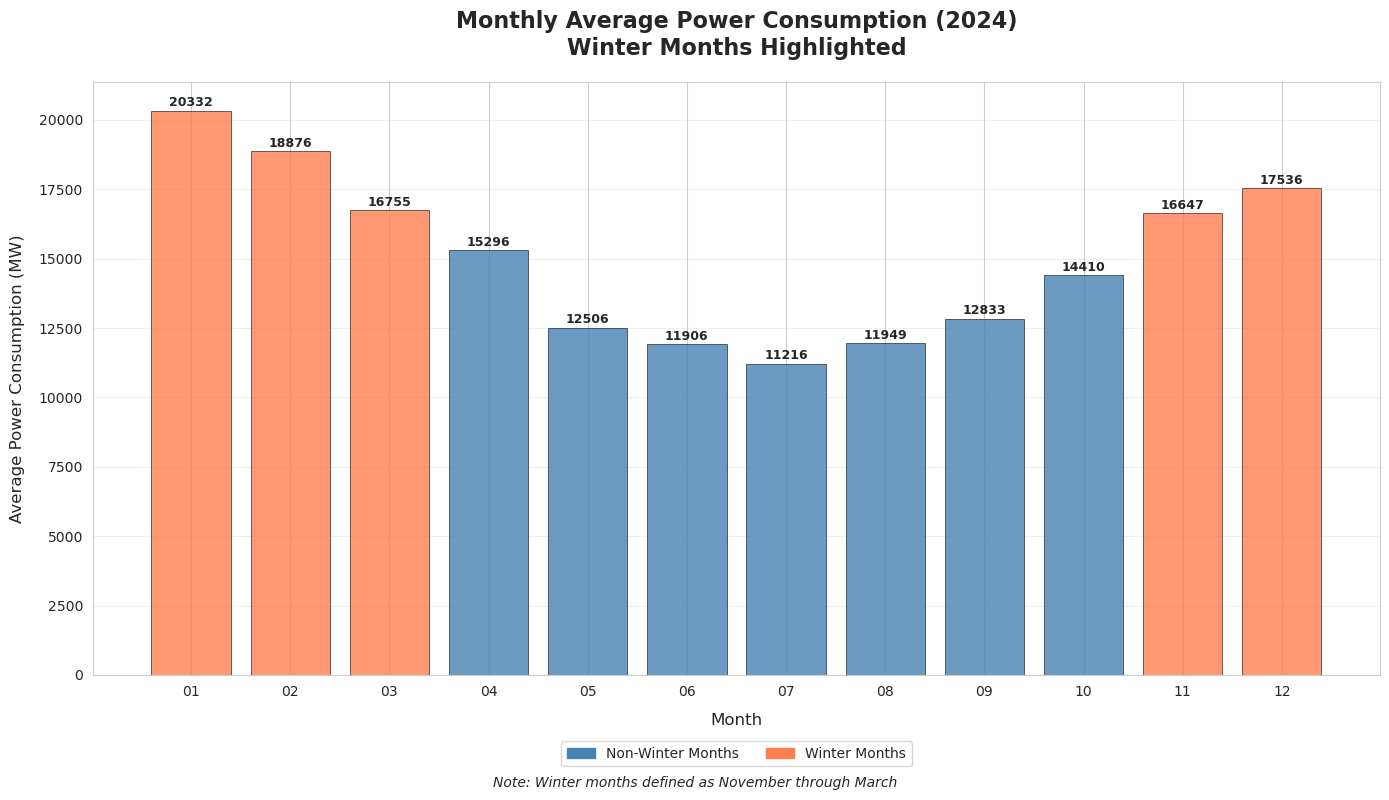

In [33]:
# Case Study 1: Monthly Power Consumption with Winter Highlight
# Set professional styling
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = [14, 8]

# Extract month from datetime index and calculate monthly averages
df['month'] = df.index.to_period('M').astype(str)
monthly_avg = df.groupby('month')['consumption'].mean().reset_index()

# Identify winter months (Nov, Dec, Jan, Feb, Mar)
winter_months = ['2024-11', '2024-12', '2024-01', '2024-02', '2024-03']
monthly_avg['is_winter'] = monthly_avg['month'].isin(winter_months)

# Create the visualization
plt.figure(figsize=(14, 8))

# Plot bars with color coding for winter vs non-winter
bars = plt.bar(range(len(monthly_avg)), monthly_avg['consumption'], 
               color=['steelblue' if not winter else 'coral' for winter in monthly_avg['is_winter']],
               alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize plot appearance
plt.ylabel('Average Power Consumption (MW)', fontsize=12, labelpad=10)
plt.title('Monthly Average Power Consumption (2024)\nWinter Months Highlighted', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Format x-axis labels
plt.xticks(range(len(monthly_avg)), [m.split('-')[1] for m in monthly_avg['month']], 
           rotation=0, fontsize=10)
plt.xlabel('Month', fontsize=12, labelpad=10)

# Add value annotations on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Create and position legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='steelblue', label='Non-Winter Months')
red_patch = mpatches.Patch(color='coral', label='Winter Months')
plt.legend(handles=[blue_patch, red_patch], loc='upper center', 
           bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=True)

# Add descriptive text
plt.figtext(0.5, 0.01, 'Note: Winter months defined as November through March', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust to make room for legend and footnote
plt.show()

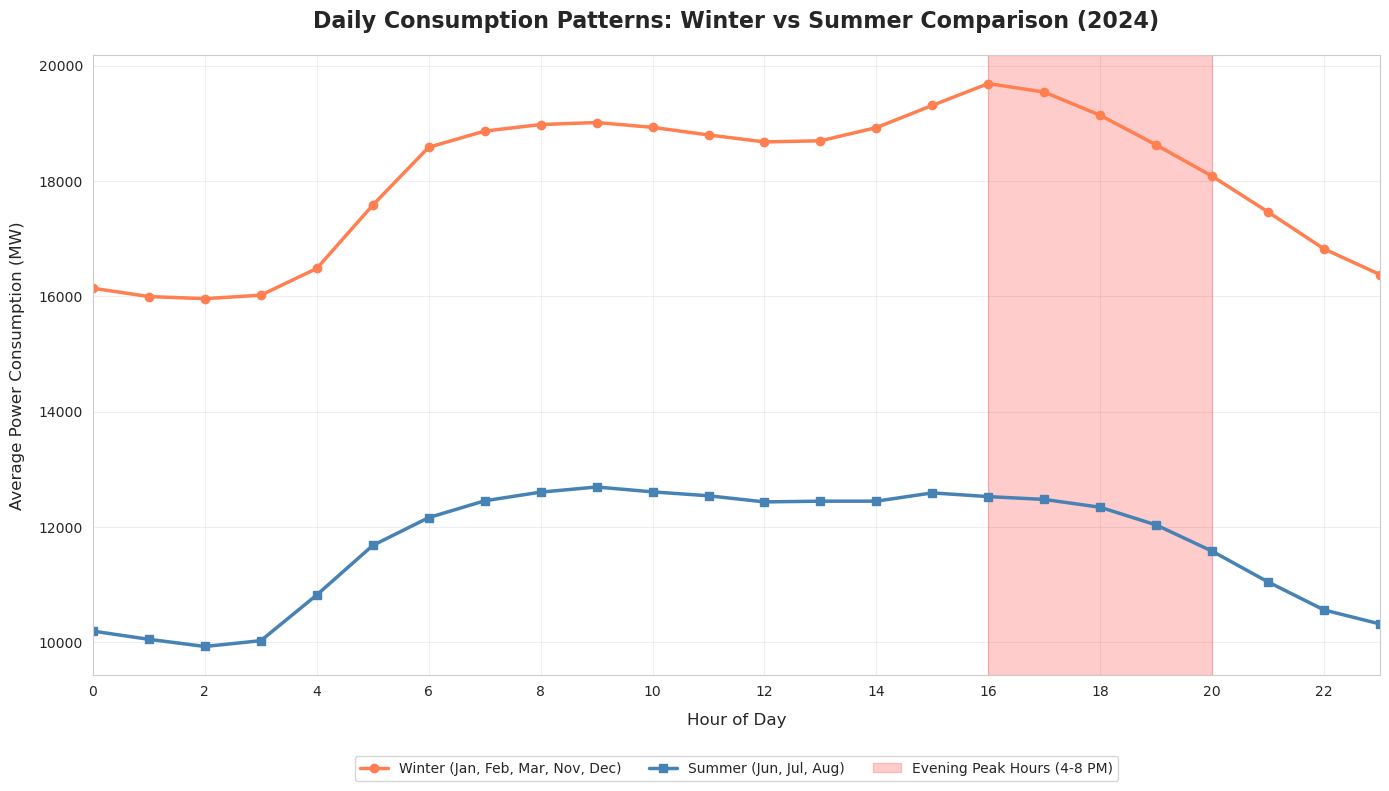

In [34]:
# Case Study 2: Daily Consumption Pattern in Winter vs Summer
# Set professional styling
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"

# Create figure with specified size
plt.figure(figsize=(14, 8))

# Extract hour from datetime index
df['hour'] = df.index.hour

# Define winter and summer months for comparison (based on 2024 data only)
winter_months = ['2024-01', '2024-02','2024-03','2024-11', '2024-12']  # January, February, December
summer_months = ['2024-06', '2024-07', '2024-08']  # June, July, August

# Filter data and calculate hourly averages
winter_data = df[df['month'].isin(winter_months)]
summer_data = df[df['month'].isin(summer_months)]

winter_hourly = winter_data.groupby('hour')['consumption'].mean().reset_index()
summer_hourly = summer_data.groupby('hour')['consumption'].mean().reset_index()

# Plot both seasonal patterns
plt.plot(winter_hourly['hour'], winter_hourly['consumption'], 
         marker='o', linewidth=2.5, color='coral', label='Winter (Jan, Feb, Mar, Nov, Dec)', markersize=6)
plt.plot(summer_hourly['hour'], summer_hourly['consumption'], 
         marker='s', linewidth=2.5, color='steelblue', label='Summer (Jun, Jul, Aug)', markersize=6)

# Customize plot appearance
plt.xlabel('Hour of Day', fontsize=12, labelpad=10)
plt.ylabel('Average Power Consumption (MW)', fontsize=12, labelpad=10)
plt.title('Daily Consumption Patterns: Winter vs Summer Comparison (2024)', fontsize=16, fontweight='bold', pad=20)
plt.grid(alpha=0.3)

# Set x-axis ticks and labels
plt.xticks(range(0, 24, 2))
plt.xlim(0, 23)

# Highlight peak hours (4 PM to 8 PM)
plt.axvspan(16, 20, alpha=0.2, color='red', label='Evening Peak Hours (4-8 PM)')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust to make room for legend
plt.show()

<Figure size 1400x1000 with 0 Axes>

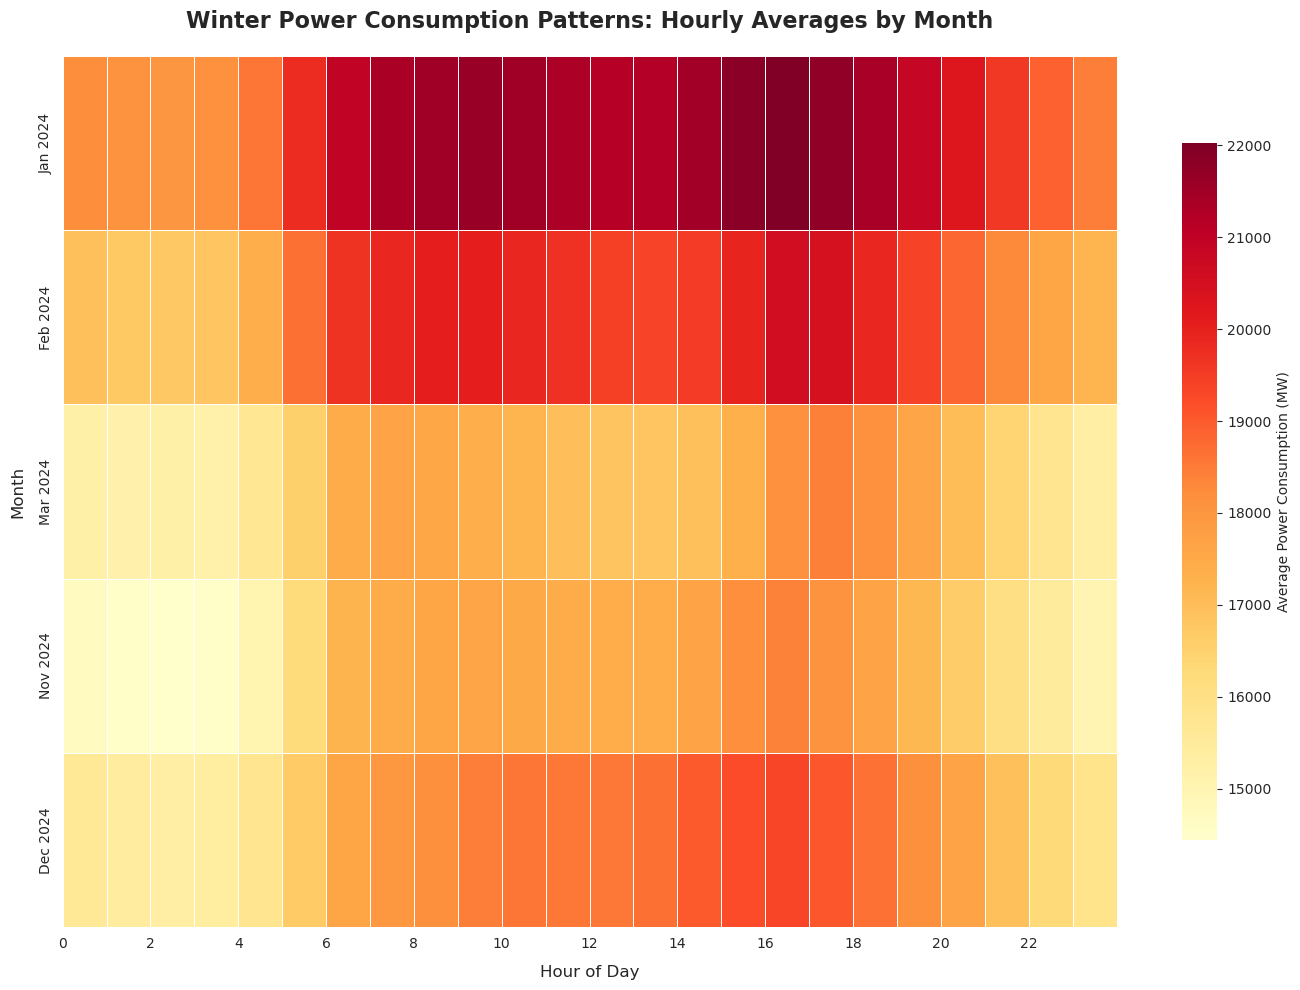

In [36]:
# Case Study 4: Winter Consumption Heatmap
# Set professional styling
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"

# Create figure with specified size
plt.figure(figsize=(14, 10))

# Define winter months (consistent with previous case studies)
winter_months = ['2024-01', '2024-02','2024-03','2024-11', '2024-12']

# Filter for winter months only
winter_data = df[df['month'].isin(winter_months)]

# Prepare data for heatmap - average consumption by month and hour
heatmap_data = winter_data.groupby(['month', 'hour'])['consumption'].mean().unstack()

# Convert month index to more readable format
heatmap_data.index = pd.to_datetime(heatmap_data.index).strftime('%b %Y')

# Create the heatmap with improved styling
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_data, 
                 cmap='YlOrRd', 
                 cbar_kws={'label': 'Average Power Consumption (MW)', 'shrink': 0.8},
                 linewidths=0.5,
                 linecolor='white')

# Customize plot appearance
plt.title('Winter Power Consumption Patterns: Hourly Averages by Month', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12, labelpad=10)
plt.ylabel('Month', fontsize=12, labelpad=10)

# Improve x-axis labels
ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels(range(0, 24, 2))

plt.tight_layout()
plt.show()